# Gerando um dataframe apenas com 25 pontos (usando média geral) filtrando pelo mês de Outubro (início do planejamento e plantio da Soja)
- Filtramos apenas dados semanais desde 2006 até 2021 para o mês de Outubro para cada cidade que possui Estação Meteorológica e unimos todos os DF's de todas as cidades em um só;
- Ao final deste Notebook, foi gerado também as informações de longitude e latitude e o csv foi exportado para trabalhar com a geoestatística posteriormente.
- Testando com apenas 25 pontos para realizar krigagem no R apenas com pontos únicos.
---

In [1]:
import pandas as pd 
import numpy as np
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import skgstat as skg

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
geolocator = Nominatim(user_agent="TMGAPP")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [3]:
def ler_dados_concatenados(cidade_selecionada, id_em_selecionado):
    """
    Função para realizar a leitura dos dados concatenados. Também é realizado um tratamento para transformar 
    a coluna de data para seu devido formato. A coluna de horário é removida.
    Todos os dados são transformados em tipo float para poder trabalhar com estatísticas posteriormente.
    Os NA's foram substituídos pela média das colunas, o que não alterou o resultado final (na média) do dataframe.
    """
    df = pd.read_csv(f'data/dados_hist_clima_concatenados/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2006_A_30-11-2021.CSV', index_col=False, decimal=',')
    df['DATA (YYYY-MM-DD)'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'])
    df.set_index('DATA (YYYY-MM-DD)', inplace=True)
    df.drop(['HORA (UTC)'], axis=1, inplace=True)

    cols = df.iloc[:, :17].columns
    for i in cols:
        df[i] = df[i].astype(str).str.replace(',','.')

    df.iloc[:, :17] = df.iloc[:, :17].astype(float) # Os dados precisam ser do tipo float para poder trabalhar com estatísticas
    df.iloc[:, :17] = df[df.iloc[:, :17] > -5] # Pegando apenas medições de números acima de -5 (A temperatura poderia chegar a ser negativa, por isso o limite)
    df = df.iloc[:, :17].fillna(df.iloc[:, :17].mean())

    # Fazendo média semanal (Weekly)
    df = df.resample('W').mean().round(2)
    df_precip = df.resample('W').sum()
    df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df_precip['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
    df = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0] # Utilizando os dados apenas maiores ou iguais a 0

    # Selecionando apenas mês de outubro (10)
    periodo_produtivo = [10] 
    df = df[df.index.map(lambda t: t.month in periodo_produtivo)]
    df = df.mean()
    df = pd.DataFrame(data=df)
    df = df.T

    df['CIDADE'] = f'{cidade_selecionada}, Parana, Brazil'

    return df

# Curitiba
---

In [4]:
df1 = ler_dados_concatenados('CURITIBA', 'A807')

In [5]:
df1

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",CIDADE
0,0.200143,912.295714,912.585429,912.011286,1158.552429,17.793857,13.104571,18.345429,17.283857,13.661714,12.576286,77.224429,71.237857,74.326429,128.549857,5.69,2.223143,"CURITIBA, Parana, Brazil"


# Ivai
---

In [6]:
df2 = ler_dados_concatenados('IVAI', 'A818')

# Castro
---

In [7]:
df3 = ler_dados_concatenados('CASTRO', 'A819')

/tmp/ipykernel_874/426052492.py:1: DtypeWarning: Columns (13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  df3 = ler_dados_concatenados('CASTRO', 'A819')


# Mal. Candido Rondon
---

In [8]:
df4 = ler_dados_concatenados('MAL. CANDIDO RONDON', 'A820')

# Joaquim Tavora
---

In [9]:
df5 = ler_dados_concatenados('JOAQUIM TAVORA', 'A821')

# Nova Tebas
---

In [10]:
df6 = ler_dados_concatenados('NOVA TEBAS', 'A822')

/tmp/ipykernel_874/1089199993.py:1: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  df6 = ler_dados_concatenados('NOVA TEBAS', 'A822')


# Inacio Martins
---

In [11]:
df7 = ler_dados_concatenados('INACIO MARTINS', 'A823')

# Icaraima
---

In [12]:
df8 = ler_dados_concatenados('ICARAIMA', 'A824')

/tmp/ipykernel_874/2691655228.py:1: DtypeWarning: Columns (13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  df8 = ler_dados_concatenados('ICARAIMA', 'A824')


# Maringa
---

In [13]:
df9 = ler_dados_concatenados('MARINGA', 'A835')

# Nova Fatima
---

In [14]:
df10 = ler_dados_concatenados('NOVA FATIMA', 'A842')

/tmp/ipykernel_874/2344849595.py:1: DtypeWarning: Columns (12,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  df10 = ler_dados_concatenados('NOVA FATIMA', 'A842')


# Dois Vizinhos
---

In [15]:
df11 = ler_dados_concatenados('DOIS VIZINHOS', 'A843')

/tmp/ipykernel_874/1530149479.py:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  df11 = ler_dados_concatenados('DOIS VIZINHOS', 'A843')


# Foz do Iguaçu
---

In [16]:
df12 = ler_dados_concatenados('FOZ DO IGUACU', 'A846')

# Diamante do Norte
---

In [17]:
df13 = ler_dados_concatenados('DIAMANTE DO NORTE', 'A849')

# Paranapoema
---

In [18]:
df14 = ler_dados_concatenados('PARANAPOEMA', 'A850')

# Planalto
---

In [19]:
df15 = ler_dados_concatenados('PLANALTO', 'A855')

/tmp/ipykernel_874/2780052131.py:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  df15 = ler_dados_concatenados('PLANALTO', 'A855')


# Cidade Gaucha
---

In [20]:
df16 = ler_dados_concatenados('CIDADE GAUCHA', 'A869')

# Japira
---

In [21]:
df17 = ler_dados_concatenados('JAPIRA', 'A871')

# Ventania
---

In [22]:
df18 = ler_dados_concatenados('VENTANIA', 'A872')

# Morretes
---

In [23]:
df19 = ler_dados_concatenados('MORRETES', 'A873')

# Sao Mateus do Sul
---

In [24]:
df20 = ler_dados_concatenados('SAO MATEUS DO SUL', 'A874')

# General Carneiro
---

In [25]:
df21 = ler_dados_concatenados('GENERAL CARNEIRO', 'A875')

# Clevelandia
---

In [26]:
df22 = ler_dados_concatenados('CLEVELANDIA', 'A876')

# Campina da Lagoa
---

In [27]:
df23 = ler_dados_concatenados('CAMPINA DA LAGOA', 'B803')

# Laranjeiras do Sul
---

In [28]:
df24 = ler_dados_concatenados('LARANJEIRAS DO SUL', 'B804')

# Colombo
---

In [29]:
df25 = ler_dados_concatenados('COLOMBO', 'B806')

# Concatenando todas as cidades
---

In [30]:
df_cidades = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, 
                        df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25], ignore_index=True)

In [31]:
df_cidades

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",CIDADE
0,0.200143,912.295714,912.585429,912.011286,1158.552429,17.793857,13.104571,18.345429,17.283857,13.661714,12.576286,77.224429,71.237857,74.326429,128.549857,5.690000,2.223143,"CURITIBA, Parana, Brazil"
1,0.224857,924.077000,924.381000,923.774143,1291.366714,19.366571,14.477000,19.996714,18.770143,14.991286,13.996857,79.060286,73.416857,76.284571,153.878714,4.969714,1.681286,"IVAI, Parana, Brazil"
2,0.182857,904.685286,904.961000,904.411143,1176.442429,17.851571,13.767571,18.457571,17.275429,14.281429,13.289429,82.496571,77.333143,79.961571,145.641429,5.102429,1.770714,"CASTRO, Parana, Brazil"
3,0.257231,967.254000,967.578000,966.943692,1394.706769,23.106923,15.766154,23.826308,22.423385,16.294923,15.259692,70.220615,64.536615,67.408154,147.423692,6.982923,3.758308,"MAL. CANDIDO RONDON, Parana, Brazil"
4,0.206154,955.119077,955.446769,954.798769,1415.939231,22.043538,15.588308,22.742769,21.371385,16.165846,15.064615,72.751077,66.934923,69.849538,169.528462,6.581385,2.726000,"JOAQUIM TAVORA, Parana, Brazil"
5,0.210154,939.308769,939.605231,939.017846,1431.307231,21.496154,15.234154,22.155231,20.862462,15.807385,14.706000,73.077692,67.656615,70.387538,179.419538,3.196462,1.482769,"NOVA TEBAS, Parana, Brazil"
6,0.249552,881.258209,881.530000,880.987313,1179.426119,16.387612,13.095970,17.007612,15.818806,13.647612,12.598657,85.711194,80.415672,83.154328,147.932687,5.294328,2.251642,"INACIO MARTINS, Parana, Brazil"
7,0.228462,968.799846,969.243692,968.368154,1150.432000,24.067385,16.748923,24.651538,23.502000,17.251231,16.269231,69.316615,64.426615,66.898769,149.235077,6.063692,2.777231,"ICARAIMA, Parana, Brazil"
8,0.220462,951.192308,951.500462,950.898615,1255.127385,23.986154,14.848308,24.607385,23.381538,15.412308,14.341385,63.595692,58.298923,60.927538,151.361538,5.983692,2.219385,"MARINGA, Parana, Brazil"
9,0.180308,938.472000,938.769538,938.186769,1486.134615,21.630000,15.018462,22.338000,20.946000,15.590923,14.484769,72.088308,66.777077,69.439538,210.170923,7.322769,3.632923,"NOVA FATIMA, Parana, Brazil"


# Gerando Latitude e Longitude das Cidades
---

In [32]:
lat = pd.Series(df_cidades['CIDADE'].unique().tolist(), index=df_cidades['CIDADE'].unique().tolist()).apply(geocode).apply(lambda location: location.latitude)
long = pd.Series(df_cidades['CIDADE'].unique().tolist(), index=df_cidades['CIDADE'].unique().tolist()).apply(geocode).apply(lambda location: location.longitude)
lat.name = 'LATITUDE'
long.name = 'LONGITUDE'
df_lat = df_cidades.merge(lat, how='left', left_on='CIDADE', right_index=True)
df_lat_long = df_lat.merge(long, how='left', left_on='CIDADE', right_index=True)

In [33]:
df_lat_long

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",CIDADE,LATITUDE,LONGITUDE
0,0.200143,912.295714,912.585429,912.011286,1158.552429,17.793857,13.104571,18.345429,17.283857,13.661714,12.576286,77.224429,71.237857,74.326429,128.549857,5.690000,2.223143,"CURITIBA, Parana, Brazil",-25.429596,-49.271272
1,0.224857,924.077000,924.381000,923.774143,1291.366714,19.366571,14.477000,19.996714,18.770143,14.991286,13.996857,79.060286,73.416857,76.284571,153.878714,4.969714,1.681286,"IVAI, Parana, Brazil",-25.006979,-50.856890
2,0.182857,904.685286,904.961000,904.411143,1176.442429,17.851571,13.767571,18.457571,17.275429,14.281429,13.289429,82.496571,77.333143,79.961571,145.641429,5.102429,1.770714,"CASTRO, Parana, Brazil",-24.794072,-49.997291
3,0.257231,967.254000,967.578000,966.943692,1394.706769,23.106923,15.766154,23.826308,22.423385,16.294923,15.259692,70.220615,64.536615,67.408154,147.423692,6.982923,3.758308,"MAL. CANDIDO RONDON, Parana, Brazil",-24.558253,-54.058782
4,0.206154,955.119077,955.446769,954.798769,1415.939231,22.043538,15.588308,22.742769,21.371385,16.165846,15.064615,72.751077,66.934923,69.849538,169.528462,6.581385,2.726000,"JOAQUIM TAVORA, Parana, Brazil",-23.499972,-49.923254
5,0.210154,939.308769,939.605231,939.017846,1431.307231,21.496154,15.234154,22.155231,20.862462,15.807385,14.706000,73.077692,67.656615,70.387538,179.419538,3.196462,1.482769,"NOVA TEBAS, Parana, Brazil",-24.437958,-51.945357
6,0.249552,881.258209,881.530000,880.987313,1179.426119,16.387612,13.095970,17.007612,15.818806,13.647612,12.598657,85.711194,80.415672,83.154328,147.932687,5.294328,2.251642,"INACIO MARTINS, Parana, Brazil",-25.572543,-51.076464
7,0.228462,968.799846,969.243692,968.368154,1150.432000,24.067385,16.748923,24.651538,23.502000,17.251231,16.269231,69.316615,64.426615,66.898769,149.235077,6.063692,2.777231,"ICARAIMA, Parana, Brazil",-23.394835,-53.616204
8,0.220462,951.192308,951.500462,950.898615,1255.127385,23.986154,14.848308,24.607385,23.381538,15.412308,14.341385,63.595692,58.298923,60.927538,151.361538,5.983692,2.219385,"MARINGA, Parana, Brazil",-23.425269,-51.938208
9,0.180308,938.472000,938.769538,938.186769,1486.134615,21.630000,15.018462,22.338000,20.946000,15.590923,14.484769,72.088308,66.777077,69.439538,210.170923,7.322769,3.632923,"NOVA FATIMA, Parana, Brazil",-23.433056,-50.561805


In [34]:
df_lat_long.shape

(25, 20)

In [35]:
df_lat_long.to_csv(f'data/dados_hist_clima_concatenados/INMET_S_PR_MEDIA_GERAL_OUTUBRO_01-01-2006_A_30-11-2021.CSV') 
# Este dataset será utilizado para plotar variogramas no arquivo '03-Variogramas.ipynb'
# Gerado com médias para o mês de Outubro. Caso precise mudar, alterar essas configurações na função

### Variogramas
---

In [36]:
coords = df_lat_long[['LATITUDE','LONGITUDE']].to_numpy()
values = df_lat_long['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].to_numpy()

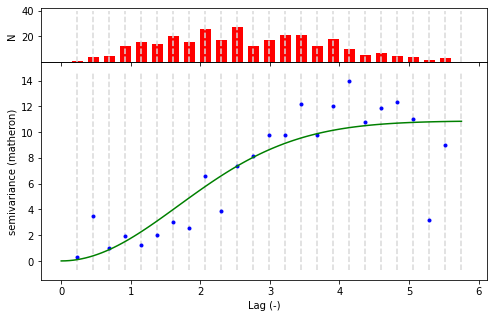

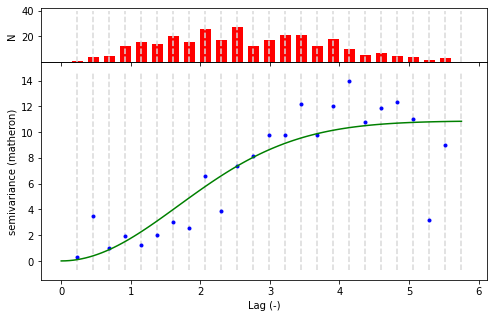

In [37]:
Vg = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=100, model='gaussian', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
Vg.plot()

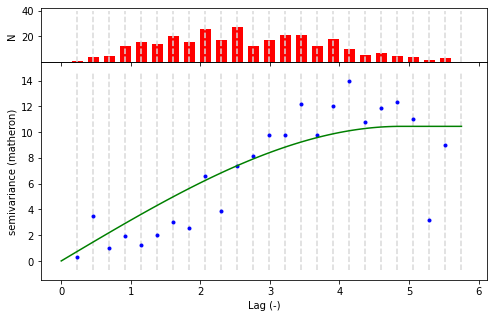

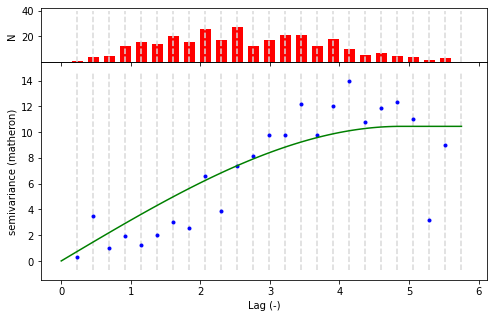

In [38]:
Vs = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=500, model='spherical', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even')
Vs.plot()

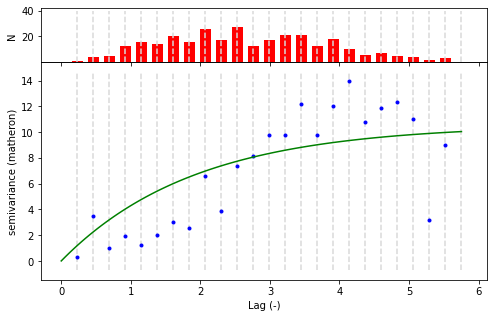

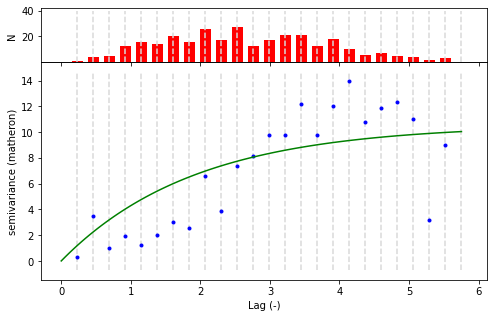

In [39]:
Vg = skg.Variogram(coords, values, normalize=False, n_lags=25, maxlag=100, model='exponential', fit_method='trf',
                   estimator='matheron', dist_func='euclidean', bin_func='even' )
Vg.plot()